# Run trained model

This notebook demonstrates running two fault detection algorithms for automated optical inspection of electrical wiring systems.

#### Imports and paths

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
from run_images import run_inference_multiple_symbols, clean_prediction, score_one_image, thresh

In [3]:
base_path = os.getcwd()

image_name = 'disconnected_002'
error_type = 'disconnected_4'

ckpt_dir = os.path.join(base_path,"train01_b16_e10/model_epoch_final.pth")

im_path = os.path.join(base_path,f"wiring_dataset/images/val01/{image_name}.png")
mask_path = os.path.join(base_path,f"wiring_dataset/masks/val01/{error_type}/{image_name}.png")
symbol_dir = os.path.join(base_path,"patch_dataset/val01/templates/")
symbol_paths = [os.path.join(symbol_dir,f) for f in os.listdir(symbol_dir) if image_name not in f]

#### Run inference

Text(0.5, 1.0, 'Euclid Distance Between Symbol Embeddings and Target Image')

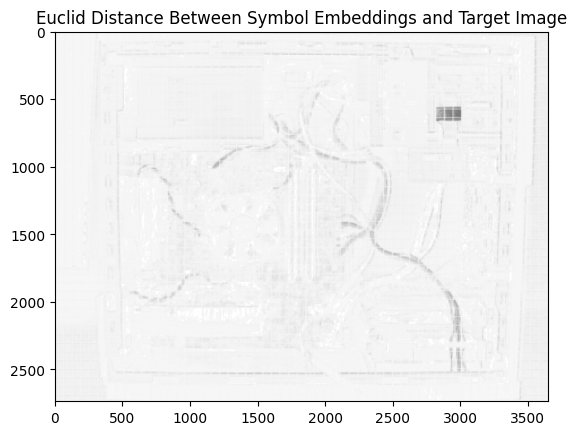

In [4]:
fault_distances = run_inference_multiple_symbols(im_path, symbol_paths, ckpt_dir, num_syms = 10)

plt.imshow(fault_distances, cmap='gray_r')
plt.title("Euclid Distance Between Symbol Embeddings and Target Image")

#### Make fault predictions

Total faults: 5
True positives: 4
False positives: 31
False negatives: 1
Precision: 0.11428571428571428
Recall: 0.8


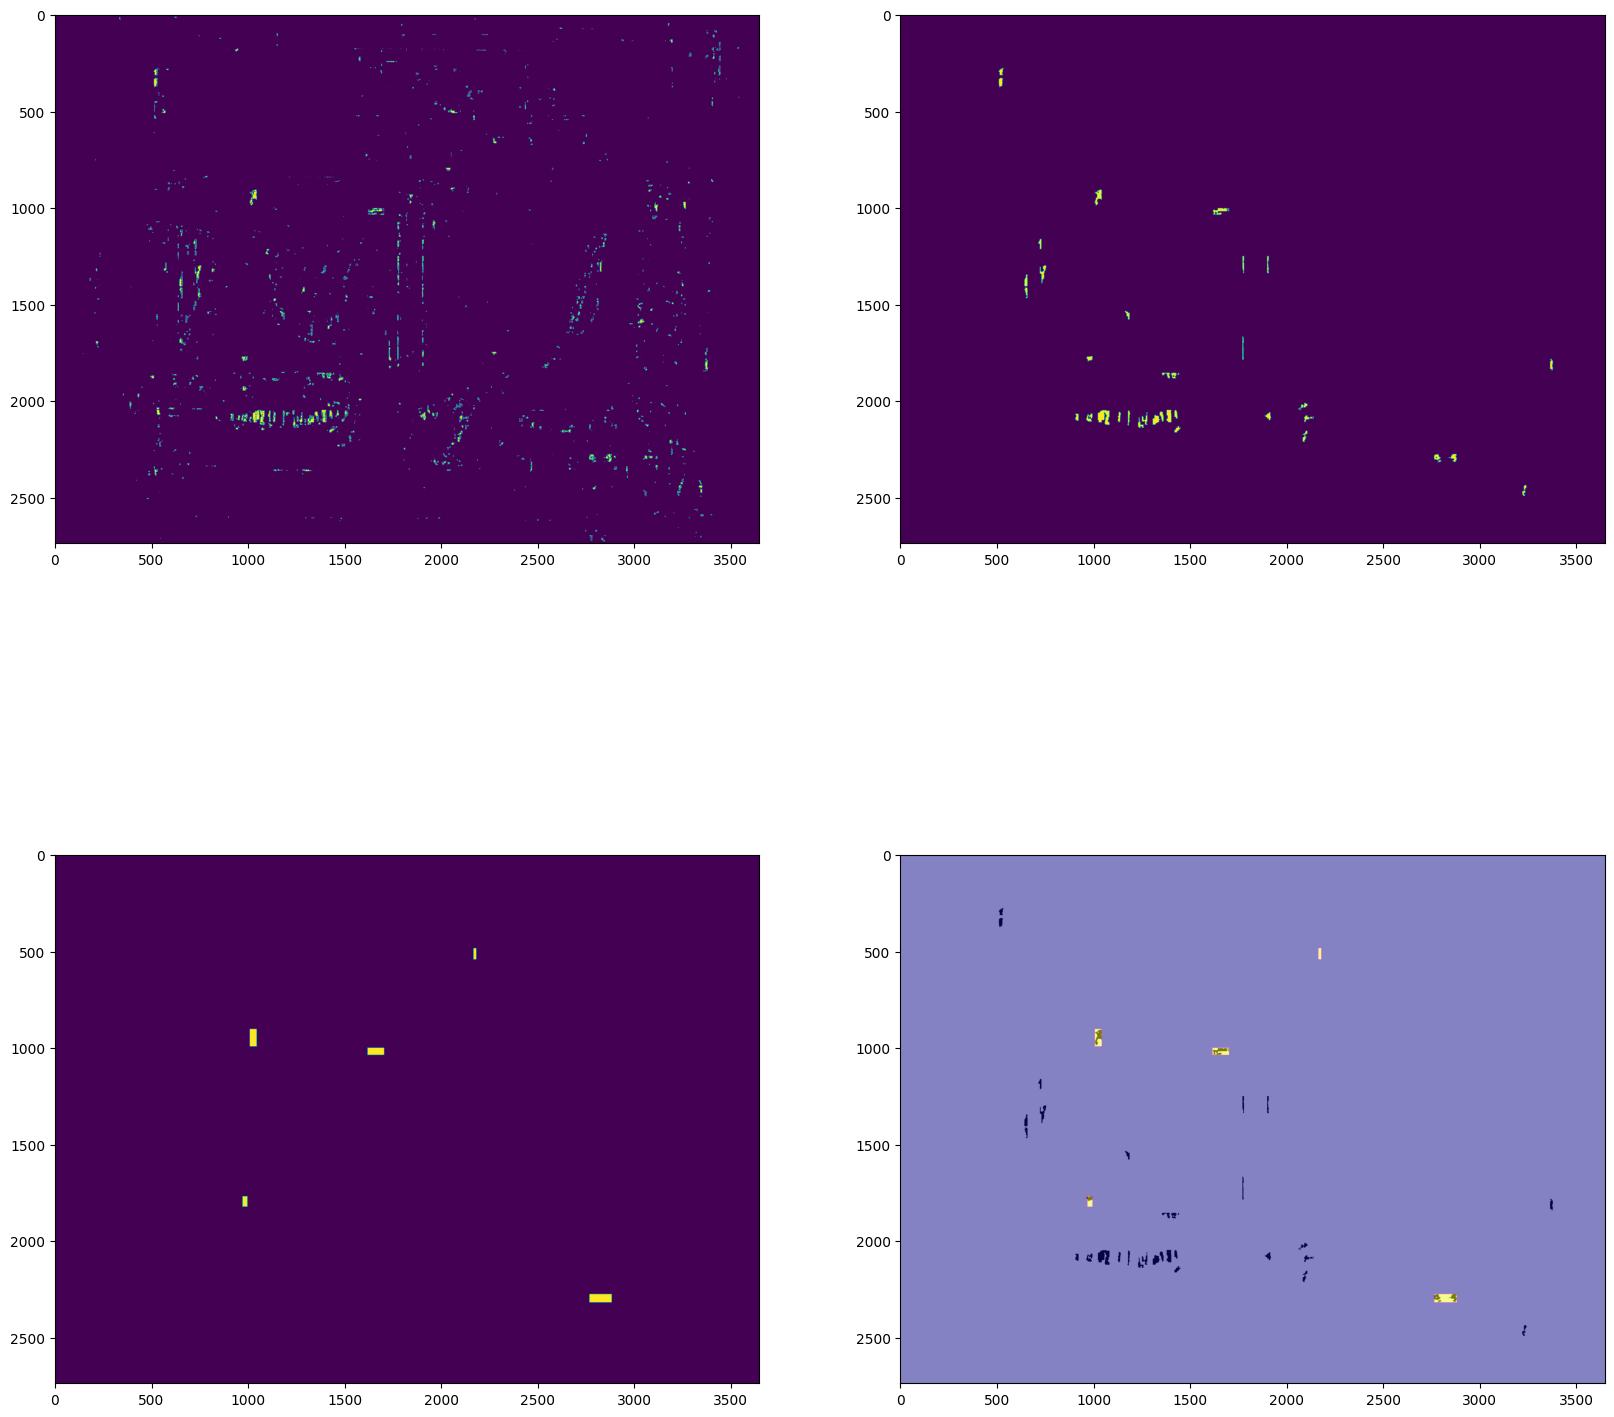

In [5]:
thresh_distances = thresh(fault_distances, thresh = 0.1)
pred_clean = clean_prediction(fault_distances, threshold = 0.1, square_size = 5, cc_cutoff = 500)
faults_pred, faults_pred_corr, faults, pred_mask = score_one_image(pred_clean, mask_path, min_mask_size = 500, overlap = 0.3)

mask = cv2.imread(mask_path)[:,:,0]
mask[mask == 255] = 1
mask[mask == 0] = 0


print(f"Total faults: {faults}")
print(f"True positives: {faults_pred_corr}")
print(f"False positives: {faults_pred - faults_pred_corr}")
print(f"False negatives: {faults - faults_pred_corr}")

print(f"Precision: {faults_pred_corr/faults_pred}")
print(f"Recall: {faults_pred_corr/faults}")

plt.figure(figsize = (20,20))
plt.subplot(221)
plt.imshow(thresh_distances)
plt.subplot(222)
plt.imshow(pred_mask)
plt.subplot(223)
plt.imshow(mask)
plt.subplot(224)
plt.imshow(mask, cmap = 'plasma')
plt.imshow(pred_mask, cmap='gray_r', alpha=0.5)
